## Import Libraries


In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, Normalizer, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

## Load Data


In [2]:
data = pd.read_csv("./thyroid.csv")
data.shape

(383, 17)

In [3]:
data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


## Data Features


The **endo predictor** dataset is a collection of clinical and pathological features of patients with endometrial cancer. The dataset has **18** columns, each representing a different feature.

- **Age:** age of the patient at diagnosis, in years
- **Gender:** biological sex of the patient, either male or female
- **Smoking:** whether the patient has a history of smoking, either yes or no
- **Hx Smoking:** number of pack-years of smoking, calculated as the number of packs of cigarettes smoked per day multiplied by the number of years the person has smoked
- **Hx Radiotherapy:** whether the patient has a history of radiotherapy, either yes or no
- **Thyroid Function:** status of the patient's thyroid gland
- **Physical Examination:** findings of the physical examination of the patient's pelvis
- **Adenopathy:** whether the patient has enlarged lymph nodes
- **Pathology:** type of endometrial cancer
- **Focality:** number of foci of cancer in the endometrium, either unifocal or multifocal
- **Risk:** risk category of the patient, based on the stage and grade of the cancer, either low, intermediate, or high
- **T:** size and extent of the primary tumor, based on the TNM staging system
- **N:** involvement of regional lymph nodes, based on the TNM staging system
- **M:** presence of distant metastasis, based on the TNM staging system, either M0 or M1
- **Stage:** overall stage of the cancer, based on the FIGO staging system
- **Response:** response of the patient to the treatment
- **`Recurred:`** whether the patient had a recurrence of the cancer, either yes or no


## Clean Data


In [4]:
data.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

> No missing values found in either of the features.


In [5]:
data = data.drop_duplicates()
data.shape

(364, 17)

> Number of samples **dropped** from `383 to 364`, indicating `19 duplicate` rows were removed from the data.


## Data Preparation


In [6]:
numerical_features:set[str]=set()
categorical_features:set[str]=set()
target_feature:str = str()

### Recurred (target)

Probable chance of respawning the cancer after treatment.


In [7]:
data["Recurred"].value_counts(normalize=True)

Recurred
No     0.703297
Yes    0.296703
Name: proportion, dtype: float64

In [8]:
target_feature="Recurred"
target_feature

'Recurred'

In [9]:
data["Recurred"] = data["Recurred"].apply(lambda x: 1 if str(x) == "Yes" else 0)
data["Recurred"].value_counts(normalize=True)

Recurred
0    0.703297
1    0.296703
Name: proportion, dtype: float64

<Axes: title={'center': 'Recurred Distribution'}, xlabel='Recurred', ylabel='Frequency'>

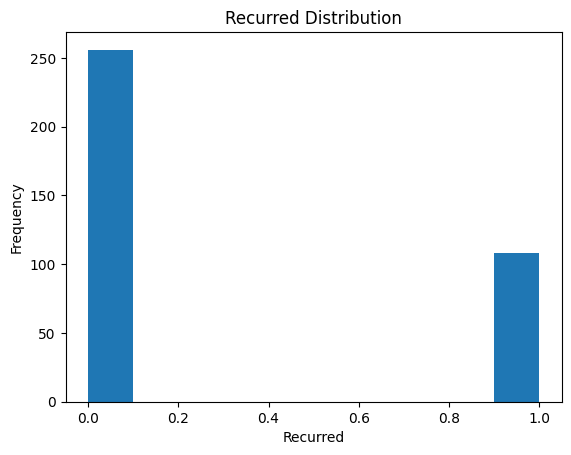

In [75]:
data["Recurred"].plot.hist(title="Recurred Distribution", xlabel="Recurred")

> - It's evident that the number of patients with endometrial cancer recurrence is more than twice.<br>
> - Replaced **Yes** with **1** and **No** with **0**


### Age

Age of the patients in years.


In [11]:
data["Age"].describe()

count    364.00000
mean      41.25000
std       15.31436
min       15.00000
25%       30.00000
50%       38.00000
75%       52.00000
max       82.00000
Name: Age, dtype: float64

In [12]:
numerical_features.add("Age")
numerical_features

{'Age'}

<Axes: title={'center': 'Age Distribution'}, xlabel='Age', ylabel='Frequency'>

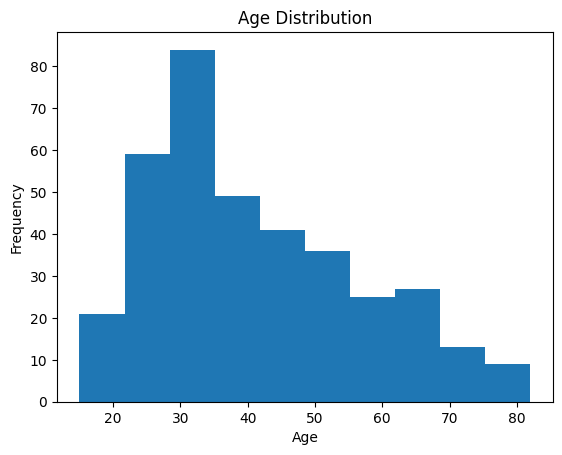

In [13]:
data["Age"].plot.hist(title="Age Distribution", xlabel="Age")

> - Average age of the patients is **41.2** years out of **364** patients. This Age feature is numerical.


In [14]:
numerical_features.add("Age")
numerical_features

{'Age'}

### Gender


In [15]:
data["Gender"].value_counts(normalize=True)

Gender
F    0.804945
M    0.195055
Name: proportion, dtype: float64

In [16]:
categorical_features.add("Gender")
categorical_features

{'Gender'}

In [17]:
data["Gender"]=data["Gender"].apply(lambda x: 1 if str(x) == "M" else 0)
data["Gender"].value_counts(normalize=True)

Gender
0    0.804945
1    0.195055
Name: proportion, dtype: float64

<Axes: title={'center': 'Gender Distribution'}, xlabel='Gender', ylabel='Frequency'>

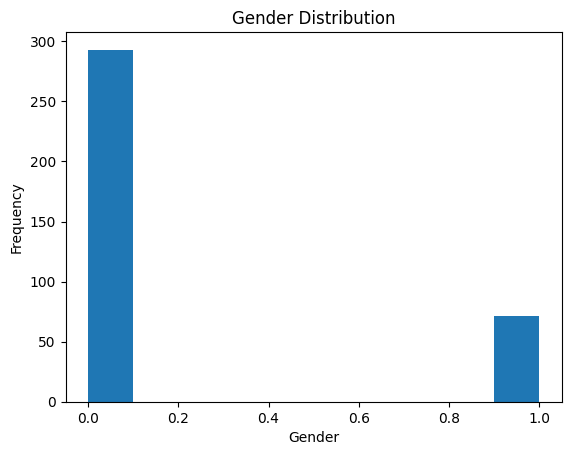

In [18]:
data["Gender"].plot.hist(title="Gender Distribution", xlabel="Gender")

> - It's evident that the number of female patients are **4x** (times) more than the male patients.<br>
> - Replaced **M** with **1** and **F** with **0**.


### Smoking

Whether the patient has a history of smoking or not.


In [19]:
data["Smoking"].value_counts(normalize=True)

Smoking
No     0.865385
Yes    0.134615
Name: proportion, dtype: float64

In [20]:
categorical_features.add("Smoking")
categorical_features

{'Gender', 'Smoking'}

In [21]:
data["Smoking"]=data["Smoking"].apply(lambda x: 1 if str(x) == "Yes" else 0)
data["Smoking"].value_counts(normalize=True)

Smoking
0    0.865385
1    0.134615
Name: proportion, dtype: float64

<Axes: title={'center': 'Smoking Distribution'}, xlabel='Gender', ylabel='Frequency'>

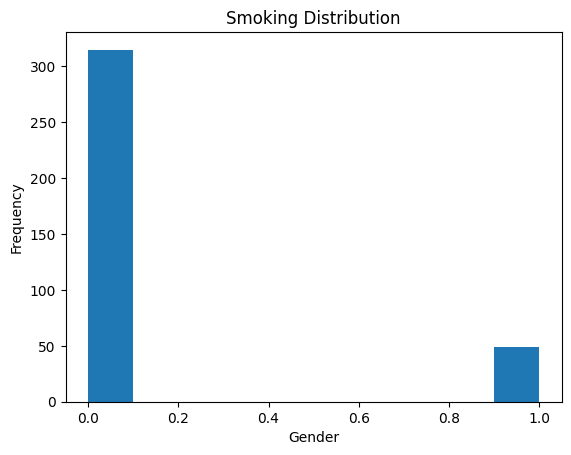

In [22]:
data["Smoking"].plot.hist(title="Smoking Distribution", xlabel="Gender")

> - It's interesting that the number of patients with history of `no smoking` is almost **7x** (times) more than the patients with history of `smoking`. <br>
> - Replaced `Smokers` with **1** and `No Smokers` with **0**.


### Hx Smoking

number of pack-years of smoking, calculated as the number of packs of cigarettes smoked per day multiplied by the number of years the person has smoked


In [23]:
data["Hx Smoking"].value_counts(normalize=True)

Hx Smoking
No     0.923077
Yes    0.076923
Name: proportion, dtype: float64

In [24]:
categorical_features.add("Hx Smoking")
categorical_features

{'Gender', 'Hx Smoking', 'Smoking'}

In [25]:
data["Hx Smoking"]=data["Hx Smoking"].apply(lambda x: 1 if str(x) == "Yes" else 0)
data["Hx Smoking"].value_counts(normalize=True)

Hx Smoking
0    0.923077
1    0.076923
Name: proportion, dtype: float64

<Axes: title={'center': 'Hx Smoking Distribution'}, xlabel='Hx Smoking', ylabel='Frequency'>

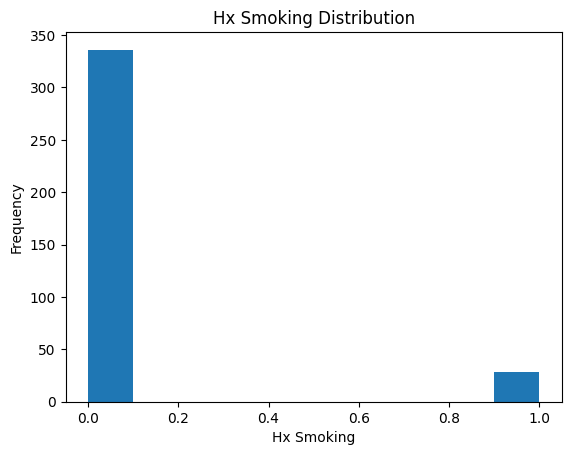

In [26]:
data["Hx Smoking"].plot.hist(title="Hx Smoking Distribution", xlabel="Hx Smoking")

> - It's evident the number of patients with No Hx Smoking 13x times more than the patients with Hx Smoking, which makes sense as the number of patients with No Smoking was also more. <br>
> - Replaced **Yes** with **1** and **No** with **0**.


### Hx Radiotherapy

whether the patient has a history of radiotherapy, either yes or no


In [27]:
data["Hx Radiothreapy"].value_counts(normalize=True)

Hx Radiothreapy
No     0.980769
Yes    0.019231
Name: proportion, dtype: float64

In [28]:
categorical_features.add("Hx Radiothreapy")
categorical_features

{'Gender', 'Hx Radiothreapy', 'Hx Smoking', 'Smoking'}

In [29]:
data["Hx Radiothreapy"]=data["Hx Radiothreapy"].apply(lambda x: 1 if str(x) == "Yes" else 0)
data["Hx Radiothreapy"].value_counts(normalize=True)

Hx Radiothreapy
0    0.980769
1    0.019231
Name: proportion, dtype: float64

<Axes: title={'center': 'Hx Radiotherapy Distribution'}, xlabel='Hx Radiotherapy', ylabel='Frequency'>

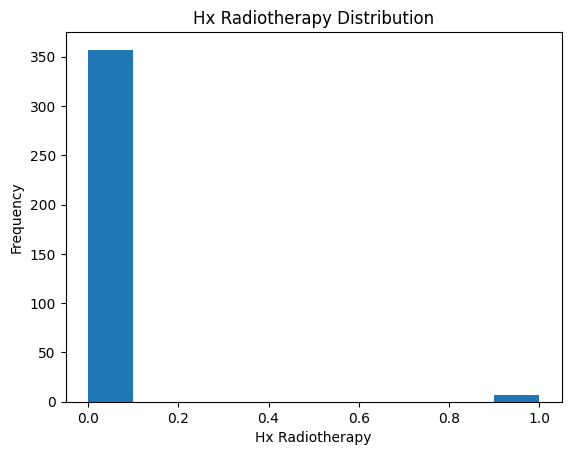

In [30]:
data["Hx Radiothreapy"].plot.hist(title="Hx Radiotherapy Distribution", xlabel="Hx Radiotherapy")

> - We can say that almost all the patients has the history of **No Radiotherapy**. <br>
> - Replaced **Yes** with **1** and **No** with **0**.


### Thyroid Function

is the status of the patient's thyroid gland, either normal, hyperthyroidism, or hypothyroidism


In [31]:
data["Thyroid Function"].value_counts(normalize=True)

Thyroid Function
Euthyroid                      0.859890
Clinical Hyperthyroidism       0.054945
Subclinical Hypothyroidism     0.038462
Clinical Hypothyroidism        0.032967
Subclinical Hyperthyroidism    0.013736
Name: proportion, dtype: float64

In [32]:
categorical_features.add("Thyroid Function")
categorical_features

{'Gender', 'Hx Radiothreapy', 'Hx Smoking', 'Smoking', 'Thyroid Function'}

In [33]:
data["Thyroid Function"]=data["Thyroid Function"].astype('category').cat.codes
data["Thyroid Function"].value_counts(normalize=True)

Thyroid Function
2    0.859890
0    0.054945
4    0.038462
1    0.032967
3    0.013736
Name: proportion, dtype: float64

### Physical Examination

is the findings of the physical examination of the patient's pelvis, either normal, suspicious, or abnormal


In [34]:
data["Physical Examination"].value_counts(normalize=True)

Physical Examination
Multinodular goiter            0.370879
Single nodular goiter-right    0.348901
Single nodular goiter-left     0.241758
Normal                         0.019231
Diffuse goiter                 0.019231
Name: proportion, dtype: float64

In [35]:
categorical_features.add("Physical Examination")
categorical_features

{'Gender',
 'Hx Radiothreapy',
 'Hx Smoking',
 'Physical Examination',
 'Smoking',
 'Thyroid Function'}

In [36]:
data["Physical Examination"]=data["Physical Examination"].astype("category").cat.codes
data["Physical Examination"].value_counts(normalize=True)

Physical Examination
1    0.370879
4    0.348901
3    0.241758
2    0.019231
0    0.019231
Name: proportion, dtype: float64

### Adenopathy

is whether the patient has enlarged lymph nodes


In [37]:
data["Adenopathy"].value_counts(normalize=True)

Adenopathy
No           0.708791
Right        0.131868
Bilateral    0.087912
Left         0.046703
Extensive    0.019231
Posterior    0.005495
Name: proportion, dtype: float64

In [38]:
categorical_features.add("Adenopathy")
categorical_features

{'Adenopathy',
 'Gender',
 'Hx Radiothreapy',
 'Hx Smoking',
 'Physical Examination',
 'Smoking',
 'Thyroid Function'}

In [39]:
data["Adenopathy"]=data["Adenopathy"].astype("category").cat.codes
data["Adenopathy"].value_counts(normalize=True)

Adenopathy
3    0.708791
5    0.131868
0    0.087912
2    0.046703
1    0.019231
4    0.005495
Name: proportion, dtype: float64

### Pathology

is the type of endometrial cancer


In [40]:
data["Pathology"].value_counts(normalize=True)

Pathology
Papillary         0.744505
Micropapillary    0.123626
Follicular        0.076923
Hurthel cell      0.054945
Name: proportion, dtype: float64

In [41]:
categorical_features.add("Pathology")
categorical_features

{'Adenopathy',
 'Gender',
 'Hx Radiothreapy',
 'Hx Smoking',
 'Pathology',
 'Physical Examination',
 'Smoking',
 'Thyroid Function'}

In [42]:
data["Pathology"]=data["Pathology"].astype("category").cat.codes
data["Pathology"].value_counts(normalize=True)

Pathology
3    0.744505
2    0.123626
0    0.076923
1    0.054945
Name: proportion, dtype: float64

### Focality

is the number of foci of cancer in the endometrium, either unifocal or multifocal


In [43]:
data["Focality"].value_counts(normalize=True)

Focality
Uni-Focal      0.626374
Multi-Focal    0.373626
Name: proportion, dtype: float64

In [44]:
categorical_features.add("Focality")
categorical_features

{'Adenopathy',
 'Focality',
 'Gender',
 'Hx Radiothreapy',
 'Hx Smoking',
 'Pathology',
 'Physical Examination',
 'Smoking',
 'Thyroid Function'}

In [45]:
data["Focality"]=data["Focality"].apply(lambda x: 1 if str(x) == "Multi-Focal" else 0)
data["Focality"].value_counts(normalize=True)

Focality
0    0.626374
1    0.373626
Name: proportion, dtype: float64

<Axes: title={'center': 'Focality Distribution'}, xlabel='Focality', ylabel='Frequency'>

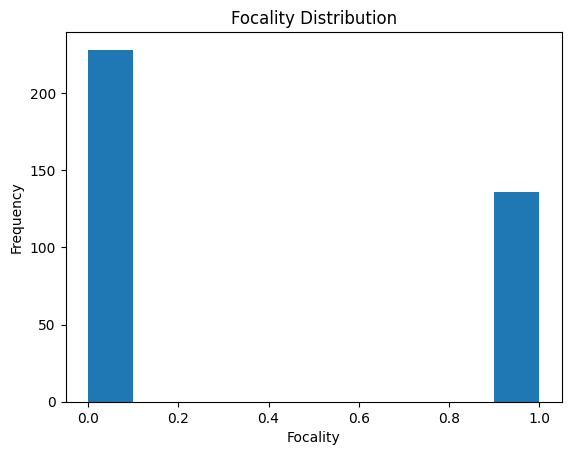

In [46]:
data["Focality"].plot.hist(title="Focality Distribution", xlabel="Focality")

> - It's evident that the patients with Uni-Focal is more than the patients with Multi-Focal
> - Replaced **Multi-Focal** with **1** and **Uni-Focal** with **0**.


### Risk

`Ordinal Feature`

is the risk category of the patient, based on the stage and grade of the cancer, either low, intermediate, or high


In [47]:
data["Risk"].value_counts(normalize=True)

Risk
Low             0.631868
Intermediate    0.280220
High            0.087912
Name: proportion, dtype: float64

In [48]:
categorical_features.add("Risk")
categorical_features

{'Adenopathy',
 'Focality',
 'Gender',
 'Hx Radiothreapy',
 'Hx Smoking',
 'Pathology',
 'Physical Examination',
 'Risk',
 'Smoking',
 'Thyroid Function'}

In [49]:
ordinal_encoder = OrdinalEncoder(categories=[["Low", "Intermediate", "High"]])
data["Risk"]=ordinal_encoder.fit_transform(X=np.reshape(data[["Risk"]], newshape=(-1,1)))
data["Risk"].value_counts(normalize=True)

Risk
0.0    0.631868
1.0    0.280220
2.0    0.087912
Name: proportion, dtype: float64

> - We can see that the percentage of Low Risk patient is more.
> - Encode the data with OrdinalEncoder, replace **Low** with **0.0**, **Intermediate** with **1.0** and **High** with **2.0**.


### T

is the size and extent of the primary tumor, based on the TNM staging system

- **T1:** Tumor is 2 cm or smaller in diameter
- **T2:** Tumor is larger than 2 cm but not larger than 5 cm in diameter
- **T3:** Tumor is larger than 5 cm in diameter
- **T4:** Tumor has grown into the chest wall or skin


In [50]:
data["T"].value_counts(normalize=True)

T
T2     0.379121
T3a    0.263736
T1a    0.126374
T1b    0.109890
T4a    0.054945
T3b    0.043956
T4b    0.021978
Name: proportion, dtype: float64

In [51]:
categorical_features.add("T")
categorical_features

{'Adenopathy',
 'Focality',
 'Gender',
 'Hx Radiothreapy',
 'Hx Smoking',
 'Pathology',
 'Physical Examination',
 'Risk',
 'Smoking',
 'T',
 'Thyroid Function'}

In [52]:
ordinal_encoder=OrdinalEncoder(categories=[["T1a","T1b","T2","T3a","T3b","T4a","T4b"]])
data["T"]=ordinal_encoder.fit_transform(X=np.reshape(data["T"], newshape=(-1,1)))
data["T"].value_counts(normalize=True)

T
2.0    0.379121
3.0    0.263736
0.0    0.126374
1.0    0.109890
5.0    0.054945
4.0    0.043956
6.0    0.021978
Name: proportion, dtype: float64

> - Replace **T1a** with **0**, **T1b** with **1**, **T2** with **2**, **T3a** with **3**, **T3b** with **4**, **T4a** with **5** and **T4b** with **6**.


### N

is the involvement of regional lymph nodes, based on the TNM staging system

- **N0:** No regional lymph node involvement
- **N1a:** Micrometastases in 1 to 3 axillary lymph nodes
- **N1b:** Macrometastases in 1 to 3 axillary lymph nodes


In [53]:
data["N"].value_counts(normalize=True)

N
N0     0.684066
N1b    0.255495
N1a    0.060440
Name: proportion, dtype: float64

In [54]:
categorical_features.add("N")
categorical_features

{'Adenopathy',
 'Focality',
 'Gender',
 'Hx Radiothreapy',
 'Hx Smoking',
 'N',
 'Pathology',
 'Physical Examination',
 'Risk',
 'Smoking',
 'T',
 'Thyroid Function'}

In [55]:
ordinal_encoder = OrdinalEncoder(categories=[["N0","N1a","N1b"]])
data["N"] = ordinal_encoder.fit_transform(X=np.reshape(a=data["N"], newshape=(-1,1)))
data["N"].value_counts(normalize=True)

N
0.0    0.684066
2.0    0.255495
1.0    0.060440
Name: proportion, dtype: float64

> - Replace **N0** with **0.0**, **N1a** with **1.0** and **N1b** with **2.0**.


### M

is the presence of distant metastasis, based on the TNM staging system, either M0 or M1

- **M0:** No distant metastasis
- **M1:** Distant metastasis


In [56]:
data["M"].value_counts(normalize=True)

M
M0    0.950549
M1    0.049451
Name: proportion, dtype: float64

In [57]:
categorical_features.add("M")
categorical_features

{'Adenopathy',
 'Focality',
 'Gender',
 'Hx Radiothreapy',
 'Hx Smoking',
 'M',
 'N',
 'Pathology',
 'Physical Examination',
 'Risk',
 'Smoking',
 'T',
 'Thyroid Function'}

In [58]:
ordinal_encoder = OrdinalEncoder(categories=[["M0","M1"]])
data["M"]=ordinal_encoder.fit_transform(X=np.reshape(a=data["M"], newshape=(-1,1)))
data["M"].value_counts(normalize=True)

M
0.0    0.950549
1.0    0.049451
Name: proportion, dtype: float64

> - Almost majority of the patients has no distant metasis.
> - Replace **M0** with **0.0** and **M1** with **1.0**.


### Stage

is the overall stage of the cancer, based on the FIGO staging system

- **Stage I:** The tumor is small and has not spread to the lymph nodes or other parts of the body.
- **Stage II:** The tumor is larger or has spread to nearby lymph nodes, but not to distant organs.
- **Stage III:** The tumor is even larger or has spread to more lymph nodes or nearby tissues, but not to distant organs.
- **Stage IV:** The cancer has spread to distant organs, such as the lungs, liver, or bones.


In [59]:
data["Stage"].value_counts(normalize=True)

Stage
I      0.862637
II     0.087912
IVB    0.030220
III    0.010989
IVA    0.008242
Name: proportion, dtype: float64

In [60]:
categorical_features.add("Stage")
categorical_features

{'Adenopathy',
 'Focality',
 'Gender',
 'Hx Radiothreapy',
 'Hx Smoking',
 'M',
 'N',
 'Pathology',
 'Physical Examination',
 'Risk',
 'Smoking',
 'Stage',
 'T',
 'Thyroid Function'}

In [61]:
ordinal_encoder = OrdinalEncoder(categories=[["I","II","III","IVA","IVB"]])
data["Stage"]=ordinal_encoder.fit_transform(X=np.reshape(a=data["Stage"], newshape=(-1,1)))
data["Stage"].value_counts(normalize=True)

Stage
0.0    0.862637
1.0    0.087912
4.0    0.030220
2.0    0.010989
3.0    0.008242
Name: proportion, dtype: float64

> - The majority of the patients has Stage I Cancer.
> - Replace I with 0.0, II with 1.0, III with 2.0, IVA with 3.0 and IVB with 4.0.


### Response

is the response of the patient to the treatment

- **Excellent:** Complete response or partial response with no evidence of disease progression or recurrence.
- **Structural Incomplete:** Partial response with residual disease or stable disease with no change in tumor size or extent.
- **Indeterminate:** Stable disease with minor changes in tumor size or extent, or progressive disease with minor increase in tumor size or extent.
- **Biochemical Incomplete:** Progressive disease with significant increase in tumor size or extent, or appearance of new lesions.


In [62]:
data["Response"].value_counts(normalize=True)

Response
Excellent                 0.519231
Structural Incomplete     0.250000
Indeterminate             0.167582
Biochemical Incomplete    0.063187
Name: proportion, dtype: float64

In [63]:
categorical_features.add("Response")
categorical_features

{'Adenopathy',
 'Focality',
 'Gender',
 'Hx Radiothreapy',
 'Hx Smoking',
 'M',
 'N',
 'Pathology',
 'Physical Examination',
 'Response',
 'Risk',
 'Smoking',
 'Stage',
 'T',
 'Thyroid Function'}

In [64]:
ordinal_encoder = OrdinalEncoder(
    categories=[["Excellent","Structural Incomplete","Indeterminate","Biochemical Incomplete"]]
    )
data["Response"]=ordinal_encoder.fit_transform(X=np.reshape(a=data["Response"],newshape=(-1,1)))
data["Response"].value_counts(normalize=True)

Response
0.0    0.519231
1.0    0.250000
2.0    0.167582
3.0    0.063187
Name: proportion, dtype: float64

> - We can see that majority of the patients has Excellent Response.
> - Replace Excellent with 0.0, Structural Incomplete with 1.0, Indeterminate with 2.0 and Biochemical Incomplete with 3.0.


## Data Scaling

In [65]:
X = data.drop(labels=["Recurred"], axis=1)
y = data["Recurred"]

In [66]:
robust = RobustScaler()
X.iloc[:,:] = robust.fit_transform(X)
X.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
0,-0.500000,0,0,0,0,0,0.000000,0,-1,0,0.0,-2.0,0.0,0.0,0.0,2.0
1,-0.181818,0,0,1,0,0,-0.666667,0,-1,0,0.0,-2.0,0.0,0.0,0.0,0.0
2,-0.363636,0,0,0,0,0,0.333333,0,-1,0,0.0,-2.0,0.0,0.0,0.0,0.0
3,1.090909,0,0,0,0,0,0.333333,0,-1,0,0.0,-2.0,0.0,0.0,0.0,0.0
4,1.090909,0,0,0,0,0,-0.666667,0,-1,1,0.0,-2.0,0.0,0.0,0.0,0.0


## Data Split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((291, 16), (73, 16), (291,), (73,))

## Modelling

### LogisticRegression - Base

In [68]:
LR = LogisticRegression()

LR.fit(
    X=X_train,
    y=y_train
)

y_pred = LR.predict(X_test)

accuracy = accuracy_score(
    y_true=y_test,
    y_pred=y_pred
)

classi_report = classification_report(
    y_true=y_test,
    y_pred=y_pred
)

print(f"Accuracy Score: {accuracy}")
print(classi_report)

Accuracy Score: 0.8356164383561644
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        49
           1       0.77      0.71      0.74        24

    accuracy                           0.84        73
   macro avg       0.82      0.80      0.81        73
weighted avg       0.83      0.84      0.83        73



### LogisticRegression - Tuned

In [69]:
param_grid = {"C": np.logspace(-3, 3, 7), "penalty": ["l1", "l2"]}

LR = LogisticRegression(solver="liblinear")
LR_GSC = GridSearchCV(LR, param_grid, cv=5, scoring="accuracy")

LR_GSC.fit(
    X=X_train,
    y=y_train
)

y_pred = LR_GSC.predict(X_test)

accuracy = accuracy_score(
    y_true=y_test,
    y_pred=y_pred
)

classi_report = classification_report(
    y_true=y_test,
    y_pred=y_pred
)

print(f"Accuracy Score: {accuracy}")
print(classi_report)


print("Best parameters: ", LR_GSC.best_params_)
print("Best score: ", LR_GSC.best_score_)

Accuracy Score: 0.8356164383561644
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        49
           1       0.77      0.71      0.74        24

    accuracy                           0.84        73
   macro avg       0.82      0.80      0.81        73
weighted avg       0.83      0.84      0.83        73

Best parameters:  {'C': 0.1, 'penalty': 'l2'}
Best score:  0.8661601402688486


### DecisionTreeClassifier - Base

In [70]:
DTC = DecisionTreeClassifier()

DTC.fit(
    X=X_train,
    y=y_train
)

y_pred = DTC.predict(X_test)

accuracy = accuracy_score(
    y_true=y_test,
    y_pred=y_pred
)

classi_report = classification_report(
    y_true=y_test,
    y_pred=y_pred
)

print(f"Accuracy Score: {accuracy}")
print(classi_report)

Accuracy Score: 0.9863013698630136
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        49
           1       0.96      1.00      0.98        24

    accuracy                           0.99        73
   macro avg       0.98      0.99      0.98        73
weighted avg       0.99      0.99      0.99        73



### DecisionTreeClassifier - Tuned

In [71]:
DTC = DecisionTreeClassifier()

param_grid = {
            'criterion': ['gini','entropy'],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 5]
        }

DTC_GSC = GridSearchCV(DTC, param_grid, cv=5, scoring="accuracy")

DTC_GSC.fit(
    X=X_train,
    y=y_train
)

y_pred = DTC_GSC.predict(X_test)

accuracy = accuracy_score(
    y_true=y_test,
    y_pred=y_pred
)

classi_report = classification_report(
    y_true=y_test,
    y_pred=y_pred
)

print(f"Accuracy Score: {accuracy}")
print(classi_report)

print("Best parameters: ", DTC_GSC.best_params_)
print("Best score: ", DTC_GSC.best_score_)

Accuracy Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        24

    accuracy                           1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73

Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best score:  0.9485680888369374


### RandomForestClassifier - Base

In [72]:
RFC = RandomForestClassifier()

RFC.fit(
    X=X_train,
    y=y_train
)

y_pred = RFC.predict(X_test)

accuracy = accuracy_score(
    y_true=y_test,
    y_pred=y_pred
)

classi_report = classification_report(
    y_true=y_test,
    y_pred=y_pred
)

print(f"Accuracy Score: {accuracy}")
print(classi_report)

Accuracy Score: 0.9863013698630136
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        49
           1       0.96      1.00      0.98        24

    accuracy                           0.99        73
   macro avg       0.98      0.99      0.98        73
weighted avg       0.99      0.99      0.99        73



### RandomForestClassifier - Tuned

In [73]:
RFC = RandomForestClassifier()

param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 5]
        }

RFC_GSC = GridSearchCV(RFC, param_grid, cv=5, scoring="accuracy")

RFC_GSC.fit(
    X=X_train,
    y=y_train
)

y_pred = RFC_GSC.predict(X_test)

accuracy = accuracy_score(
    y_true=y_test,
    y_pred=y_pred
)

classi_report = classification_report(
    y_true=y_test,
    y_pred=y_pred
)

print(f"Accuracy Score: {accuracy}")
print(classi_report)

print("Best parameters: ", RFC_GSC.best_params_)
print("Best score: ", RFC_GSC.best_score_)

Accuracy Score: 0.9726027397260274
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        49
           1       0.92      1.00      0.96        24

    accuracy                           0.97        73
   macro avg       0.96      0.98      0.97        73
weighted avg       0.97      0.97      0.97        73

Best parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score:  0.927936879018118


In [76]:
from sklearn.metrics import roc_auc_score

In [77]:
roc_auc_score(y_test,y_pred)

0.9795918367346939